<a href="https://colab.research.google.com/github/Sri777harsha/FML/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report as cr, confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.naive_bayes import GaussianNB

In [20]:
data=pd.read_csv('/content/drive/MyDrive/Movie_classification.csv')
print("Done")

Done


In [21]:
data.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [22]:
data.describe()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


There are lots of string data in the dataset so we need label them

In [23]:
data.nunique()

Marketing expense      504
Production expense      76
Multiplex coverage      81
Budget                 446
Movie_length           356
Lead_ Actor_Rating     339
Lead_Actress_rating    354
Director_rating        339
Producer_rating        353
Critic_rating           74
Trailer_views          504
3D_available             2
Time_taken             449
Twitter_hastags        423
Genre                    4
Avg_age_actors          42
Num_multiplex          293
Collection             228
Start_Tech_Oscar         2
dtype: int64

In [24]:
data.shape

(506, 19)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [38]:
le=Le()

In [39]:
data1=data
for i in data:
  if(type(i)!="pandas.core.series.Series"):
    data1[i]=le.fit_transform(data[i])

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Marketing expense    506 non-null    int64
 1   Production expense   506 non-null    int64
 2   Multiplex coverage   506 non-null    int64
 3   Budget               506 non-null    int64
 4   Movie_length         506 non-null    int64
 5   Lead_ Actor_Rating   506 non-null    int64
 6   Lead_Actress_rating  506 non-null    int64
 7   Director_rating      506 non-null    int64
 8   Producer_rating      506 non-null    int64
 9   Critic_rating        506 non-null    int64
 10  Trailer_views        506 non-null    int64
 11  3D_available         506 non-null    int64
 12  Time_taken           506 non-null    int64
 13  Twitter_hastags      506 non-null    int64
 14  Genre                506 non-null    int64
 15  Avg_age_actors       506 non-null    int64
 16  Num_multiplex        506 n

In [29]:
data1.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,0,19,29,320,172,147,168,155,149,33,448,1,13,113,3,4,105,137,1
1,23,56,44,279,225,120,128,113,107,21,355,0,177,181,2,23,76,113,0
2,22,56,44,400,159,118,122,118,112,21,488,0,183,422,1,19,72,196,1
3,32,16,47,383,112,76,76,78,75,44,423,1,349,135,2,26,85,193,1
4,110,16,47,395,139,79,78,72,78,44,459,0,307,137,2,36,22,203,1


Now every column in the dataset is converted into numerical datatype which is suitable to perform operations

In [40]:
data1.nunique()

Marketing expense      504
Production expense      76
Multiplex coverage      81
Budget                 446
Movie_length           356
Lead_ Actor_Rating     339
Lead_Actress_rating    354
Director_rating        339
Producer_rating        353
Critic_rating           74
Trailer_views          504
3D_available             2
Time_taken             450
Twitter_hastags        423
Genre                    4
Avg_age_actors          42
Num_multiplex          293
Collection             228
Start_Tech_Oscar         2
dtype: int64

There are no null values present in the dataset so we can continue with our process


In [41]:
data1.isnull().sum()


Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

Now we need to divide the input column and prediction column.  We need to predict the income column

In [32]:
data1.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,0,19,29,320,172,147,168,155,149,33,448,1,13,113,3,4,105,137,1
1,23,56,44,279,225,120,128,113,107,21,355,0,177,181,2,23,76,113,0
2,22,56,44,400,159,118,122,118,112,21,488,0,183,422,1,19,72,196,1
3,32,16,47,383,112,76,76,78,75,44,423,1,349,135,2,26,85,193,1
4,110,16,47,395,139,79,78,72,78,44,459,0,307,137,2,36,22,203,1


In [43]:
x=data1.drop('Start_Tech_Oscar',axis=1)
y=data1['Start_Tech_Oscar']

In [45]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=89)

In [46]:
print(x_train.shape)

(404, 18)


In [48]:
gnb=GaussianNB()

In [49]:
gnb.fit(x_train,y_train)

GaussianNB()

In [50]:
y_train_pred=gnb.predict(x_train)
y_test_pred=gnb.predict(x_test)

In [63]:
cm_train=confusion_matrix(y_train,y_train_pred)
cm_test=confusion_matrix(y_test,y_test_pred)

In [64]:
print(cm_train)
print(cm_test)

[[105  82]
 [ 80 137]]
[[31 12]
 [26 33]]


<Axes: title={'center': 'CONFUSION MATRIX'}>

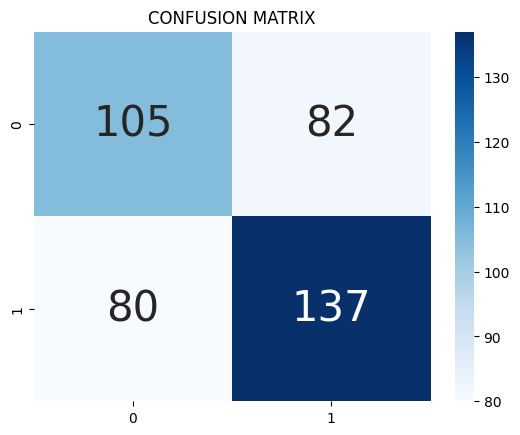

In [68]:
ax=plt.axes()
df_cm=cm_train
ax.set_title('CONFUSION MATRIX')
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)

<Axes: title={'center': 'CONFUSION MATRIX'}>

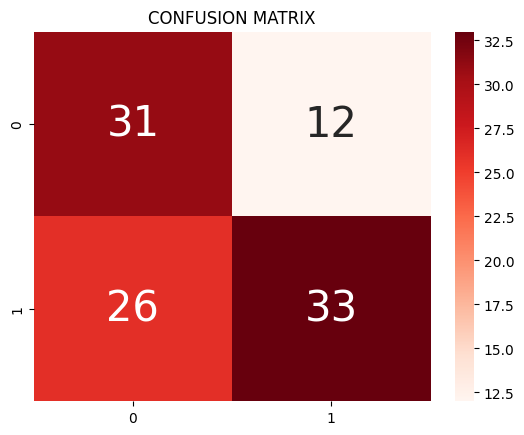

In [70]:
ax=plt.axes()
df_cm=cm_test
ax.set_title('CONFUSION MATRIX')
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Reds",ax=ax)

In [71]:
data1.corr()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
Marketing expense,1.000000,0.730736,-0.819568,-0.311527,0.700589,0.738717,0.735429,0.740273,0.726635,-0.284550,-0.613009,-0.108504,0.020920,-0.034545,-0.061005,0.083021,0.738558,-0.549595,0.066242
Production expense,0.730736,1.000000,-0.730600,-0.442412,0.603781,0.669220,0.671365,0.668841,0.666922,-0.321369,-0.607908,-0.119713,-0.001450,-0.081683,-0.109141,0.039124,0.645861,-0.574401,-0.030297
Multiplex coverage,-0.819568,-0.730600,1.000000,0.312481,-0.808168,-0.884829,-0.886439,-0.885654,-0.878660,0.247547,0.626869,0.051041,0.002190,0.042348,0.077876,-0.076884,-0.888849,0.532100,0.013303
Budget,-0.311527,-0.442412,0.312481,1.000000,-0.269922,-0.252464,-0.246400,-0.248081,-0.252216,0.229211,0.624011,0.158819,-0.011868,0.066690,0.034220,-0.051394,-0.300737,0.644302,-0.054792
Movie_length,0.700589,0.603781,-0.808168,-0.269922,1.000000,0.792895,0.789881,0.792822,0.790720,-0.224931,-0.644349,0.000640,-0.005573,-0.057458,-0.074596,0.079985,0.716170,-0.512650,0.022342
Lead_ Actor_Rating,0.738717,0.669220,-0.884829,-0.252464,0.792895,1.000000,0.996601,0.996091,0.989981,-0.188233,-0.552478,-0.027331,0.035416,-0.034369,-0.046929,0.063157,0.785708,-0.405301,-0.004739
Lead_Actress_rating,0.735429,0.671365,-0.886439,-0.246400,0.789881,0.996601,1.000000,0.996523,0.989920,-0.186984,-0.548265,-0.023058,0.037032,-0.038349,-0.046871,0.063266,0.787351,-0.401098,-0.012025
Director_rating,0.740273,0.668841,-0.885654,-0.248081,0.792822,0.996091,0.996523,1.000000,0.989676,-0.185382,-0.548986,-0.025387,0.032197,-0.041677,-0.049890,0.069833,0.789362,-0.401994,-0.006058
Producer_rating,0.726635,0.666922,-0.878660,-0.252216,0.790720,0.989981,0.989920,0.989676,1.000000,-0.185862,-0.549066,-0.025189,0.020770,-0.047679,-0.042464,0.056422,0.779761,-0.402177,-0.016192
Critic_rating,-0.284550,-0.321369,0.247547,0.229211,-0.224931,-0.188233,-0.186984,-0.185382,-0.185862,1.000000,0.275092,0.044323,-0.039729,0.010181,-0.014329,-0.052689,-0.179832,0.347701,-0.004461


In [73]:
print(cr(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.54      0.72      0.62        43
           1       0.73      0.56      0.63        59

    accuracy                           0.63       102
   macro avg       0.64      0.64      0.63       102
weighted avg       0.65      0.63      0.63       102



In [74]:
print(cr(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       187
           1       0.63      0.63      0.63       217

    accuracy                           0.60       404
   macro avg       0.60      0.60      0.60       404
weighted avg       0.60      0.60      0.60       404

